In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [3]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [4]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [5]:
#df_heart=pd.read_csv('F:/analytix_labs/extras/Health care Data set on Heart attack possibility/heart.csv')
df_heart=pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')

In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df_heart.apply(continuous_var_summary)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
N,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,16473.000000,207.000000,293.000000,39882.000000,74618.000000,45.000000,160.000000,45343.000000,99.000000,315.000000,424.000000,221.000000,701.000000,165.000000
MEAN,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
MEDIAN,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
STD,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
VAR,82.484558,0.217166,1.065132,307.586453,2686.426748,0.126877,0.276528,524.646406,0.220707,1.348095,0.379735,1.045724,0.374883,0.248836
MIN,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P1,35.000000,0.000000,0.000000,100.000000,149.000000,0.000000,0.000000,95.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
P5,39.100000,0.000000,0.000000,108.000000,175.000000,0.000000,0.000000,108.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [8]:
def cont_boxplot(x):
    sns.boxplot(x)
    plt.show()
def cont_distplot(x):
    sns.distplot(x)
    plt.show()

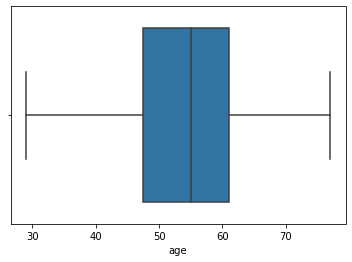

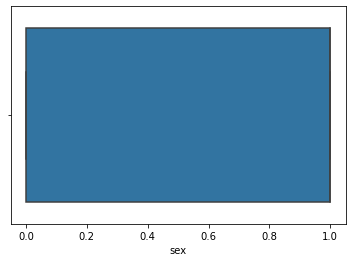

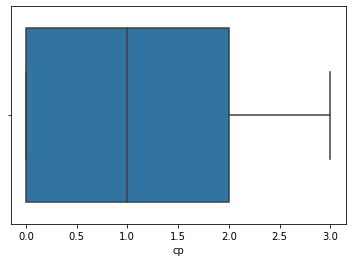

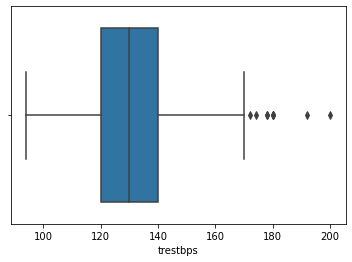

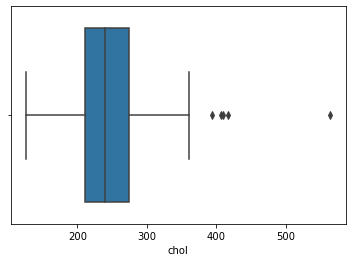

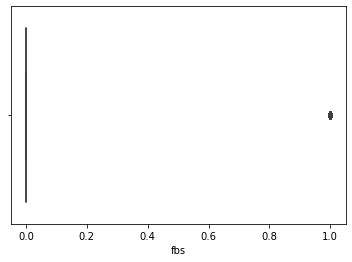

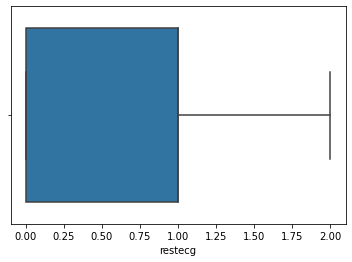

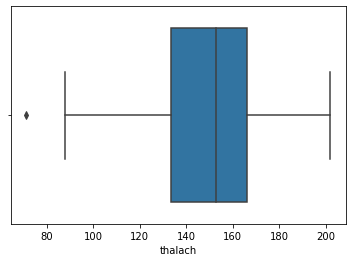

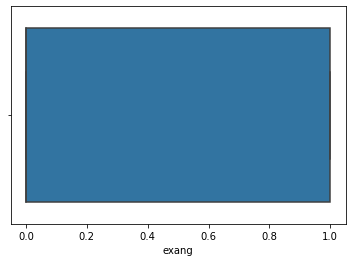

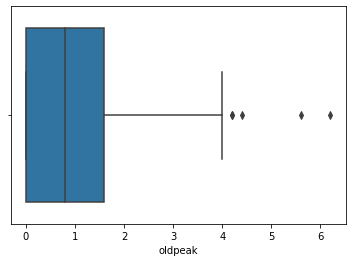

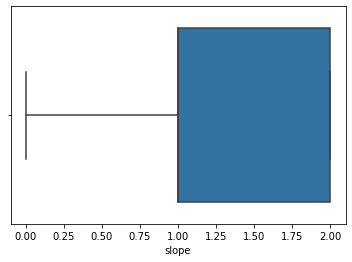

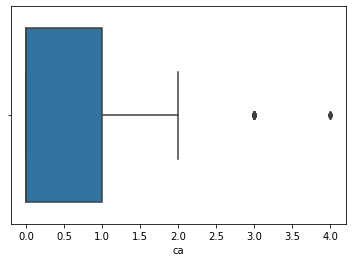

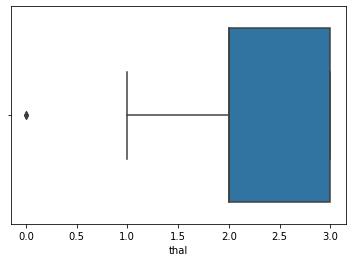

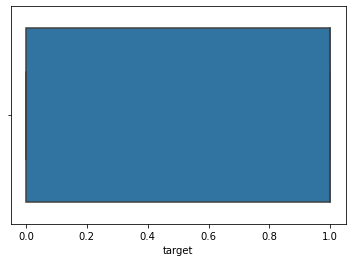

age         None
sex         None
cp          None
trestbps    None
chol        None
fbs         None
restecg     None
thalach     None
exang       None
oldpeak     None
slope       None
ca          None
thal        None
target      None
dtype: object

In [9]:
df_heart.apply(cont_boxplot)

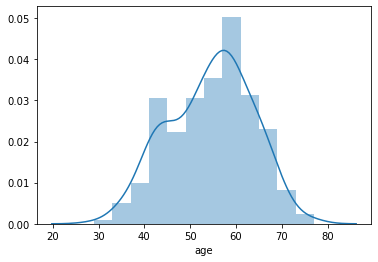

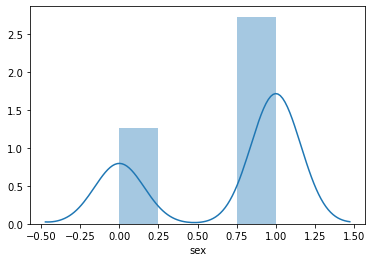

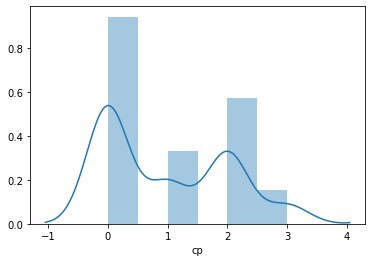

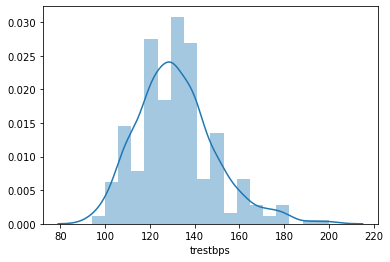

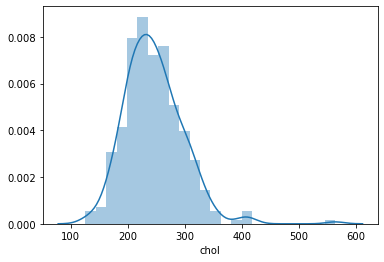

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

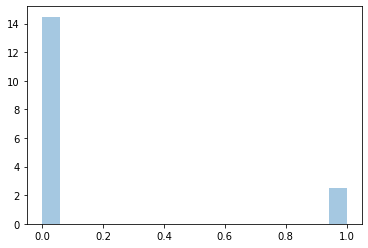

In [10]:
df_heart.apply(cont_distplot)

In [11]:
df_heart_cont=df_heart[['age','trestbps','chol','thalach','oldpeak']]
df_heart_cat=df_heart.loc[:,df_heart.columns.difference(['age','trestbps','chol','thalach','oldpeak'])]

In [12]:
df_heart.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [13]:
target=df_heart_cat.target

In [14]:
df_heart_cat.drop(columns='target',inplace=True)

In [15]:
# for c_feature in categorical_features
for c_feature in list(df_heart_cat.columns):
    df_heart_cat[c_feature] = df_heart_cat[c_feature].astype('category')
    df_heart_cat = create_dummies(df_heart_cat, c_feature)

In [16]:
df_heart_cat

,ca_1,ca_2,ca_3,ca_4,cp_1,cp_2,cp_3,exang_1,fbs_1,restecg_1,restecg_2,sex_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
299,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1
300,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1
301,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1


In [17]:
df_heart_cat=df_heart_cat.astype('category')

In [18]:
df_heart_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ca_1       303 non-null    category
 1   ca_2       303 non-null    category
 2   ca_3       303 non-null    category
 3   ca_4       303 non-null    category
 4   cp_1       303 non-null    category
 5   cp_2       303 non-null    category
 6   cp_3       303 non-null    category
 7   exang_1    303 non-null    category
 8   fbs_1      303 non-null    category
 9   restecg_1  303 non-null    category
 10  restecg_2  303 non-null    category
 11  sex_1      303 non-null    category
 12  slope_1    303 non-null    category
 13  slope_2    303 non-null    category
 14  thal_1     303 non-null    category
 15  thal_2     303 non-null    category
 16  thal_3     303 non-null    category
dtypes: category(17)
memory usage: 6.7 KB


In [19]:
df_heart_new=pd.concat([df_heart_cont,df_heart_cat],axis=1)

In [20]:
target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.tree as dt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [22]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(df_heart_new,
                                                  target,
                                                  test_size = 0.3,
                                                  random_state = 555 )

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
#!pip install imblearn

ros = RandomOverSampler(random_state=123)

train_X_os, train_y_os = ros.fit_sample(train_X, train_y)

unique_elements, counts_elements = np.unique(train_y_os, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1]
 [117 117]]


In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
pargrid_rf = {'n_estimators': np.arange(50,60,70),
                  'max_features': np.arange(3,8)}

#from sklearn.grid_search import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X_os, train_y_os)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.9s finished


In [27]:
gscv_results.best_params_

{'max_features': 6, 'n_estimators': 50}

In [28]:
gscv_rf.best_score_

0.8846438482886217

In [29]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=50, max_features=3, n_jobs=-1)
#radm_clf.fit( train_X_os, train_y_os )
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_features=3, n_estimators=50, n_jobs=-1,
                       oob_score=True)

In [30]:
train_y_pred=radm_clf.predict(train_X)
test_y_pred=radm_clf.predict(test_X)

In [31]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [32]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.6923076923076923
0.6950096899224807


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Text(0.5, 15.0, 'Predicted label')

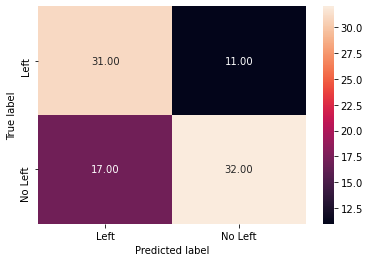

In [33]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [35]:
clf = SVC(kernel='linear')
clf.fit(train_X_os, train_y_os)

SVC(kernel='linear')

In [36]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf.predict( test_X ) } )

In [37]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.7912087912087912
0.7899709302325582


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Text(0.5, 15.0, 'Predicted label')

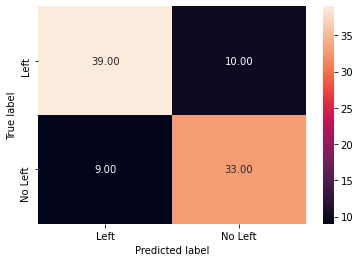

In [38]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(radm_test_pred.actual, radm_test_pred.predicted)) 

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        43
           1       0.80      0.81      0.80        48

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [41]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(train_X_os, train_y_os) 

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

In [42]:
print(grid.best_params_) 

{'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [43]:
print(grid.best_estimator_) 

SVC(C=100, gamma=1, kernel='linear')


In [44]:
print(grid.best_score_)

0.863459759481961


In [45]:
clf = SVC(kernel='linear',C=100,gamma=1)
clf.fit(train_X_os, train_y_os)

SVC(C=100, gamma=1, kernel='linear')

In [46]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf.predict( test_X ) } )

In [47]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.7802197802197802
0.778343023255814
